In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('chess_games.csv')
df.head()
df.describe()

,game_id,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,10029.500000,60.465999,1596.631868,1588.831987,4.816981
std,5790.390185,33.570585,291.253376,291.036126,2.797152
min,1.000000,1.000000,784.000000,789.000000,1.000000
25%,5015.250000,37.000000,1398.000000,1391.000000,3.000000
50%,10029.500000,55.000000,1567.000000,1562.000000,4.000000
75%,15043.750000,79.000000,1793.000000,1784.000000,6.000000
max,20058.000000,349.000000,2700.000000,2723.000000,28.000000


In [3]:
low_df = df[df['white_rating'] <= 1650]
print(low_df.head())

   game_id  rated  turns victory_status winner time_increment       white_id  \
0        1  False     13    Out of Time  White           15+2       bourgris   
1        2   True     16         Resign  Black           5+10           a-00   
2        3   True     61           Mate  White           5+10         ischia   
3        4   True     61           Mate  White           20+0  daniamurashov   
4        5   True     95           Mate  White           30+3      nik221107   

   white_rating      black_id  black_rating  \
0          1500          a-00          1191   
1          1322     skinnerua          1261   
2          1496          a-00          1500   
3          1439  adivanov2009          1454   
4          1523  adivanov2009          1469   

                                               moves opening_code  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...          D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...          B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 

In [4]:
high_df = df[df['white_rating'] >= 1650]
print(high_df.head())

    game_id  rated  turns victory_status winner time_increment      white_id  \
26       27   True     43         Resign  White          10+10  gmcarlsen403   
39       40  False     34         Resign  White          30+30       rajuppi   
43       44  False     66         Resign  White          40+40       rajuppi   
48       49  False     35           Mate  White          40+40       rajuppi   
49       50  False     41           Mate  White          40+40       rajuppi   

    white_rating           black_id  black_rating  \
26          1825  shivangithegenius          1079   
39          2449  shivangithegenius           978   
43          2443  shivangithegenius           978   
48          2436  shivangithegenius           978   
49          2436  shivangithegenius           978   

                                                moves opening_code  \
26  e4 e5 Nf3 Nc6 d4 exd4 Bc4 Bc5 c3 dxc3 Bxf7+ Kx...          C45   
39  c4 e5 Nc3 Bc5 g3 Nc6 Bg2 Nf6 Nf3 b6 Nxe5 Bb7 N...       

In [5]:
low_winner_mean = low_df.groupby('winner')[['white_rating']].mean()
print(low_winner_mean)

        white_rating
winner              
Black    1385.691869
Draw     1411.461538
White    1424.911075


In [6]:
high_winner_mean = high_df.groupby('winner')[['white_rating']].mean()
print(high_winner_mean)

        white_rating
winner              
Black    1858.951490
Draw     1919.997807
White    1893.785011


               Opening played  freq
23           Alekhine Defense   137
79               Amar Opening    10
94              Amazon Attack     6
64          Anderssen Opening    18
73             Barnes Defense    12
..                        ...   ...
30                Vienna Game    97
85               Ware Defense     9
58               Ware Opening    22
77  Yusupov-Rubinstein System    10
15          Zukertort Opening   182

[122 rows x 2 columns]


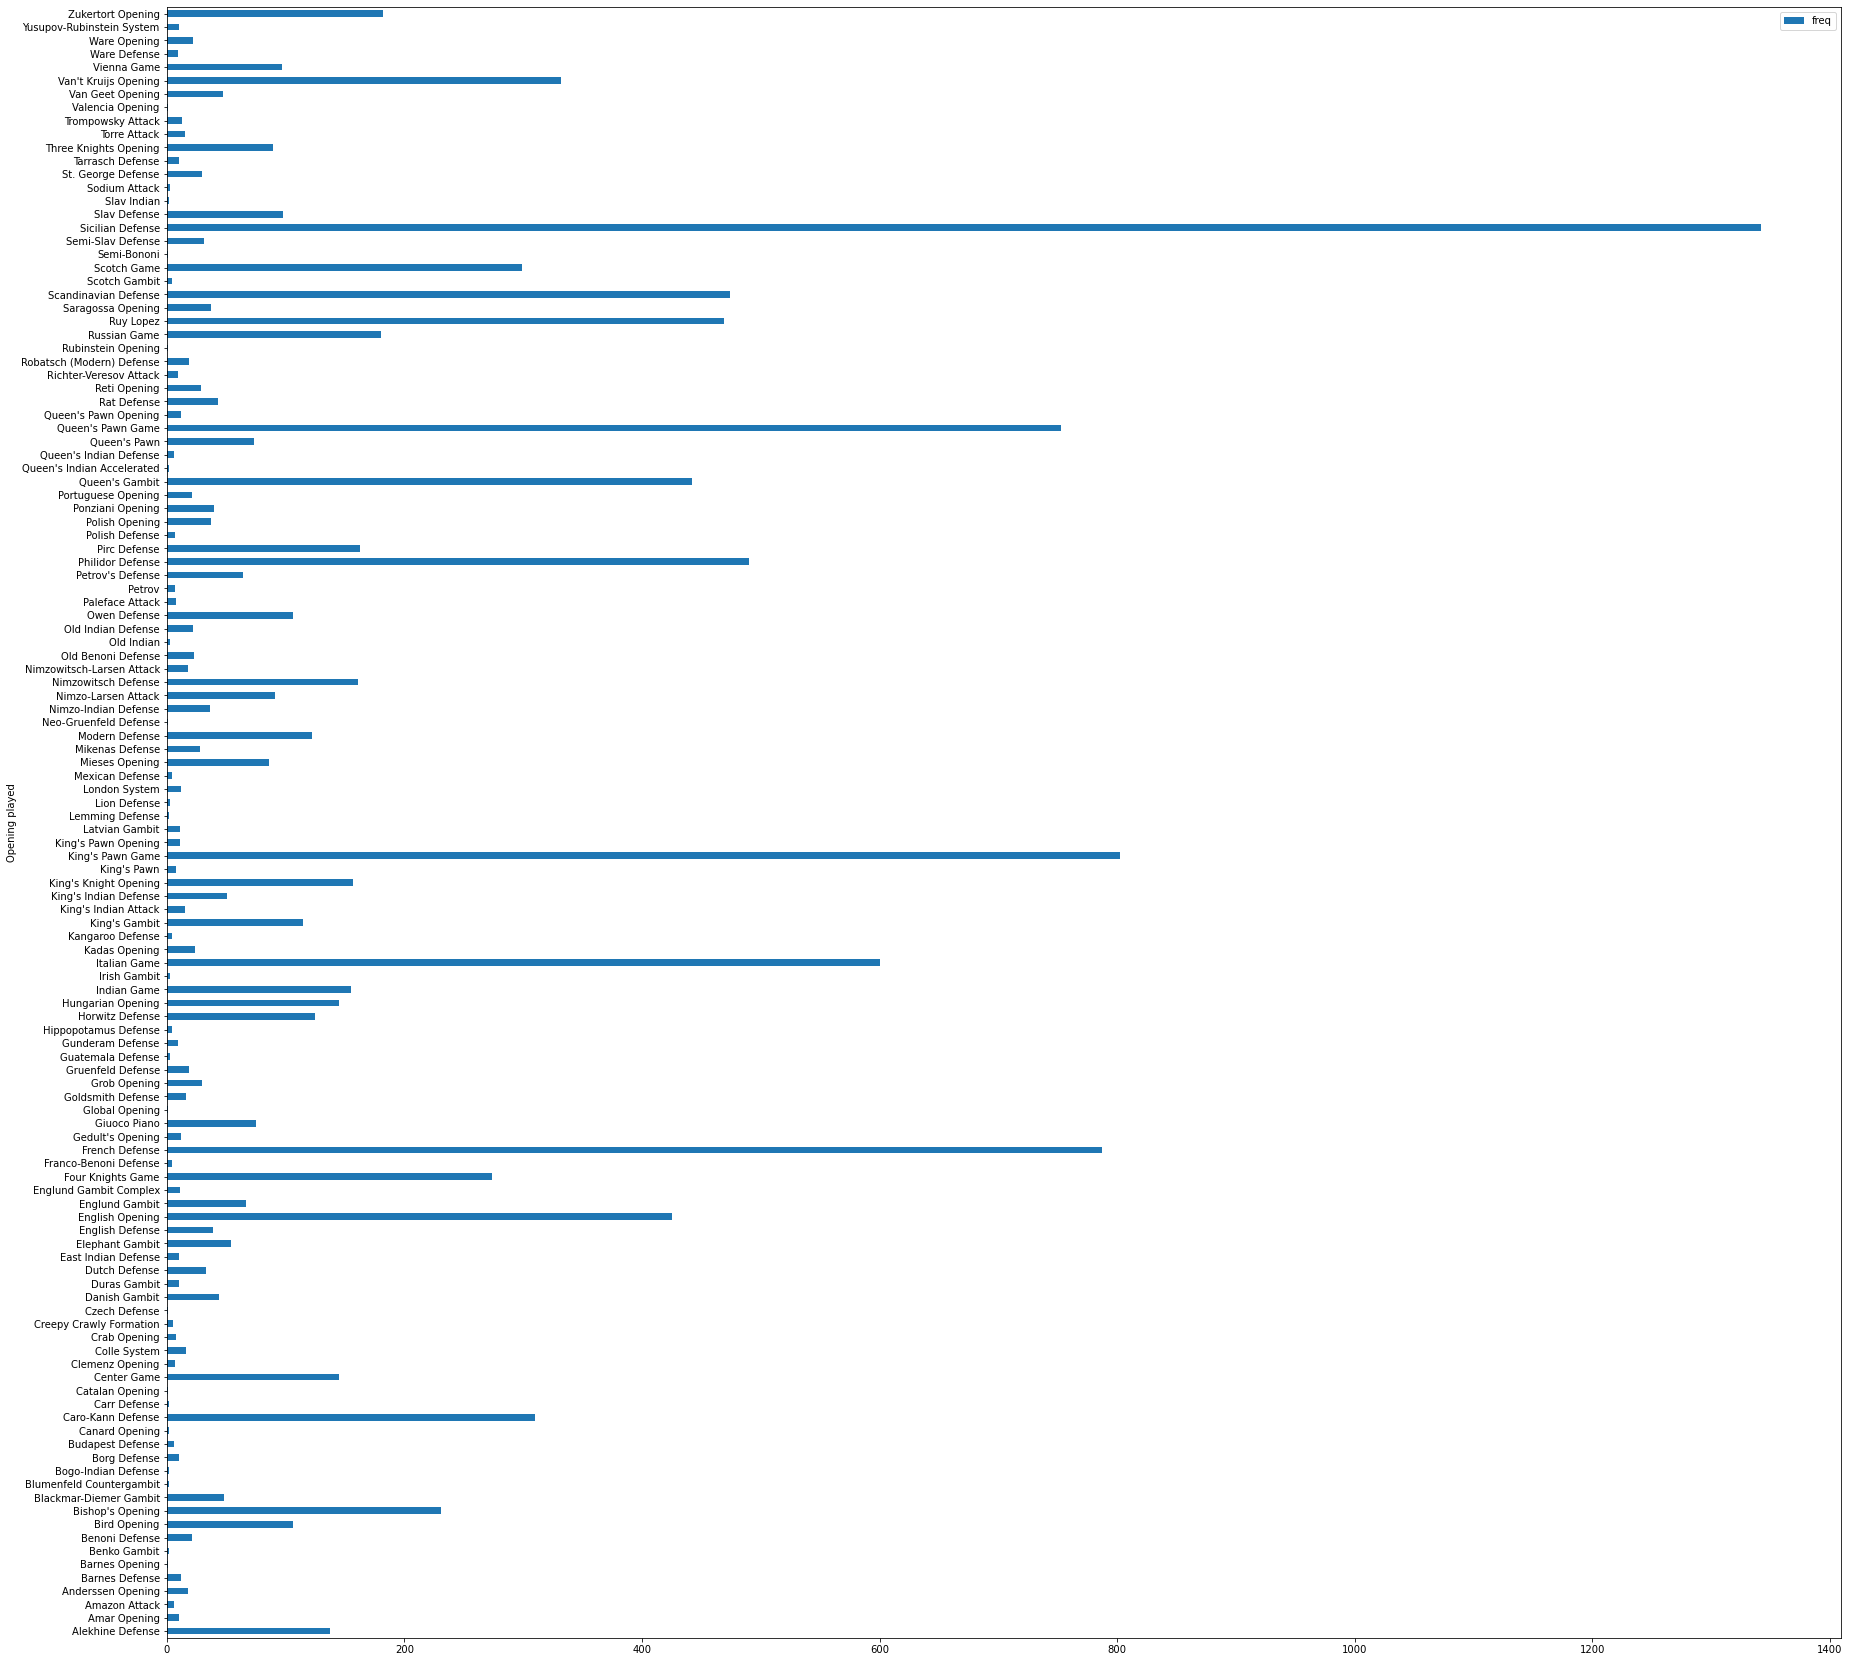

In [7]:
col = 'opening_shortname' 
col_name = 'Opening played'
low_opening_freq = low_df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
low_opening_freq = low_opening_freq.sort_values(by = col_name)
print(low_opening_freq)
ax = low_opening_freq.plot.barh(x=col_name, y='freq', rot=0, figsize = (30,30))

                Opening played  freq
31            Alekhine Defense    55
84                Amar Opening     4
74           Anderssen Opening     8
115         Australian Defense     1
86              Barnes Defense     4
..                         ...   ...
111               Wade Defense     2
89                Ware Defense     3
109               Ware Opening     2
70   Yusupov-Rubinstein System    10
12           Zukertort Opening   154

[122 rows x 2 columns]


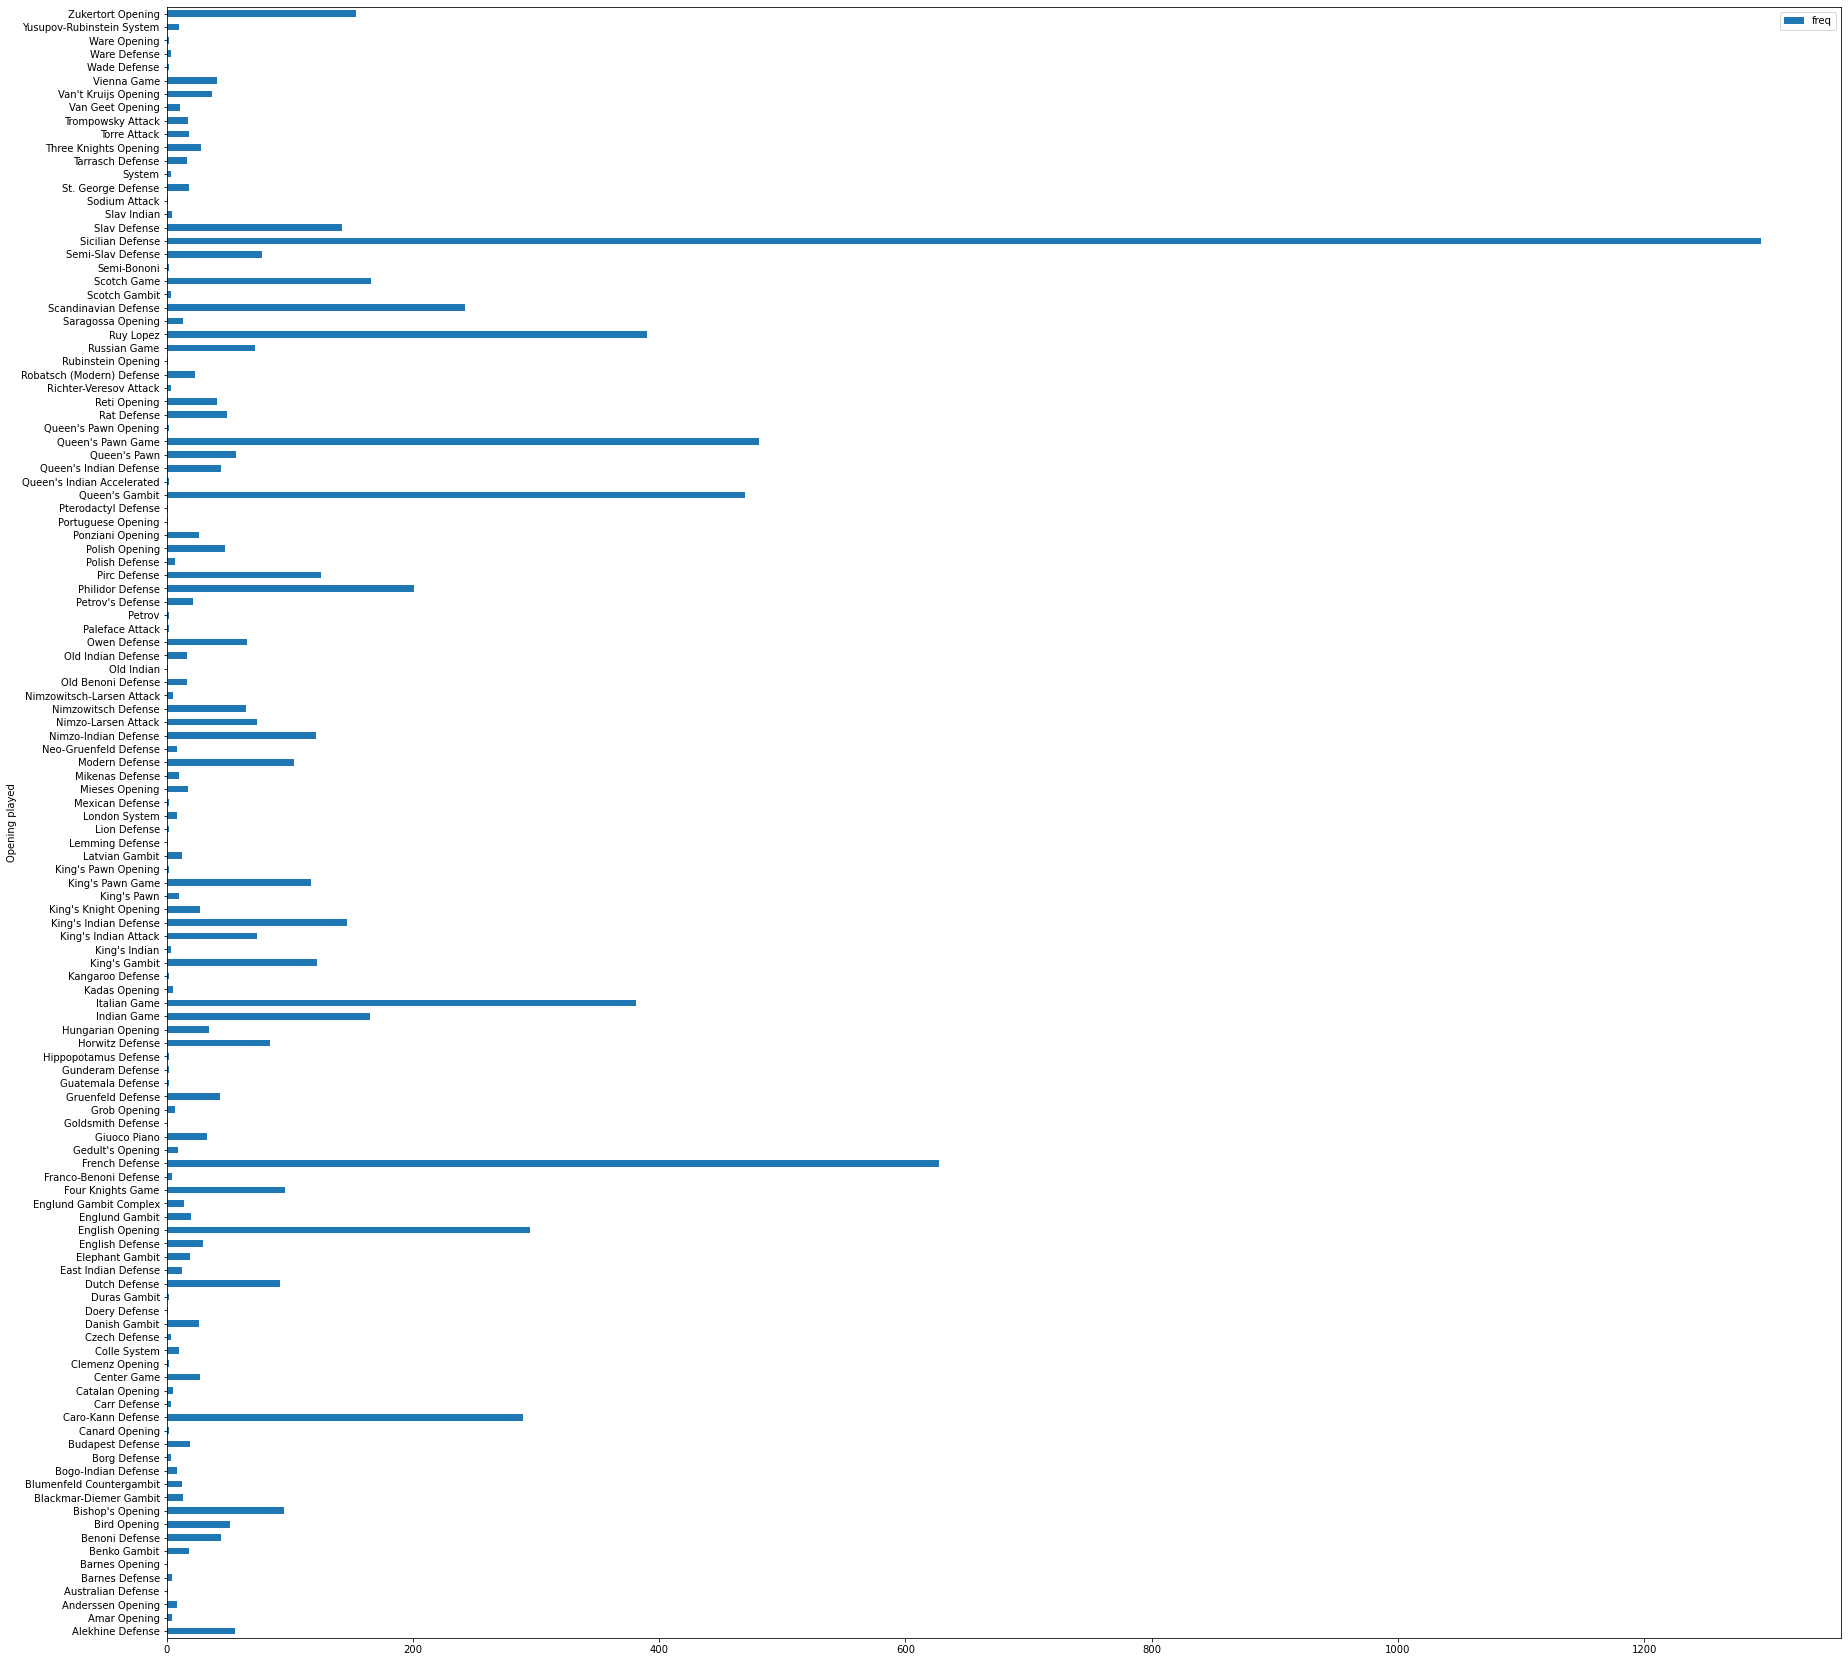

In [8]:
col = 'opening_shortname' 
col_name = 'Opening played'
high_opening_freq = high_df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
high_opening_freq = high_opening_freq.sort_values(by = col_name)
print(high_opening_freq)
ax = high_opening_freq.plot.barh(x=col_name, y='freq', rot=0, figsize = (30,30))

In [ ]:
df['winner'].value_counts()

In [ ]:
df['opening_shortname'].value_counts()